# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json

In [63]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [64]:
imag_pred = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open("image_predictions.tsv", "wb") as f:
    f.write(imag_pred.content)

In [65]:
image_predictions = pd.read_csv("image_predictions.tsv", sep="\t")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

The code for the Twitter API is below, however it is commented out because I was not able to get the elevated privledges needed to use the API

In [66]:
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer
#
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'
#
#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)
#
#api = tweepy.API(auth, wait_on_rate_limit=True)
#
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
#    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [67]:
tweets = requests.get('https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt')
with open('tweet_json.txt', 'wb') as f:
        f.write(tweets.content)

In [68]:
tweet_data = pd.read_json('tweet_json.txt', lines=True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [69]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Looks like I can use when retweeted_status_id is not null to determine which tweets are retweets. We do not want retweets in this dataset.

In [70]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [71]:
twitter_archive[twitter_archive.retweeted_status_id.notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


Looks like doggo, floofer, pupper, puppo are different "types" of dogs.

In [72]:
twitter_archive[twitter_archive.doggo != "None"].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,None,None
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,None,None,None


In [73]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Looks like the dog breeds and other obejcts appear multiple times. These could be considered categories

In [74]:
image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pomeranian                        29
Pekinese                          29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

In [75]:
image_predictions[image_predictions['p2_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
34,666435652385423360,https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg,1,Chesapeake_Bay_retriever,0.184130,True,chain_saw,5.677530e-02,False,power_drill,3.676340e-02,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
48,666826780179869698,https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg,1,Maltese_dog,0.359383,True,teddy,1.487590e-01,False,West_Highland_white_terrier,1.060070e-01,True


In [76]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [77]:
twitter_archive.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None
2352           a
2353          

In [78]:
tweet_data.id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
12      889665388333682689
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      888078434458587136
20      887705289381826560
21      887517139158093824
22      887473957103951883
23      887343217045368832
24      887101392804085760
25      886983233522544640
26      886736880519319552
27      886680336477933568
28      886366144734445568
29      886267009285017600
               ...        
2324    666411507551481857
2325    666407126856765440
2326    666396247373291520
2327    666373753744588802
2328    666362758909284353
2329    666353288456101888
2

### Quality issues
1. There are retweets in the dataset

2. twitter archive timestamp is a string not a time

3. image prediction p1, p2, p3 are strings, not categories

4. all tweet ids are ints, but is not useful mathematically

5. the twitter archive source column has html in it.

6. The source column seems categorical, but is a string.

7. Some dog beeds in the image predictions are lower case and some are upper case

8. Some of the dog names in tweet_data are not names ("None", "the", "a")

### Tidiness issues
1. doggo, floofer pupper, puppo are columns rather than values in a single column.

2. The tweet archive and tweet data are separate tables

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [79]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
tweet_data_clean = tweet_data.copy()
image_predictions_clean = image_predictions.copy()

### Issue #1:

#### The tweet id and id are integers, but they are not useful mathematically in any way. Because these are references/identifiers for the tweets, they should be strings. We will change each tweet id to a string.

#### Code

In [80]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
tweet_data_clean.id = tweet_data_clean.id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

#### Test

In [81]:
assert twitter_archive_clean.tweet_id.dtype == pd.Series(dtype=str).dtype
assert tweet_data_clean.id.dtype == pd.Series(dtype=str).dtype
assert image_predictions_clean.tweet_id.dtype == pd.Series(dtype=str).dtype

### Issue #2:

#### The tweet archive and tweet data are separate tables. These should be combined into one so we have one table containing all of the twitter data.

#### Code

Change the name of the id column in twee_data from id to tweet_id to help with the merge.

In [82]:
tweet_data_clean.rename(columns={"id":"tweet_id"}, inplace=True)

In [83]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
tweet_id                         2354 non-null object
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 

In [84]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [85]:
full_tweet_data_clean = pd.merge(twitter_archive_clean, tweet_data_clean[["tweet_id", "retweet_count", "favorite_count"]], on="tweet_id", how="left")

There are two tweets from the twitter_archive_clean that were not present in the tweet_data_clean, however, these tweets are retweets, so the will soon be removed and we can ignore them for now.

In [86]:
full_tweet_data_clean[full_tweet_data_clean.favorite_count.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None,NaN,NaN
815,771004394259247104,NaN,NaN,2016-08-31 15:19:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @katieornah: @dog_rates learning a lot at c...,7.710021e+17,1.732729e+09,2016-08-31 15:10:07 +0000,https://twitter.com/katieornah/status/77100213...,12,10,None,None,None,pupper,None,NaN,NaN


#### Test

We can see from .info() that the tables were merged.

In [87]:
full_tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 2

### Issue #3:

#### The retweets in the dataset should be removed because we only care about dog rating tweets.

#### Code

We can use the retweeted_status_id column to help remove any retweets. If this column is not null, then it is a retweet.

In [88]:
full_tweet_data_clean = full_tweet_data_clean[full_tweet_data_clean.retweeted_status_id.isnull()]

#### Test

test to ensure that every value in retweeted_status_id is null (meaning none are retweets)

In [89]:
assert all(full_tweet_data_clean.retweeted_status_id.isnull())

### Issue #4:

#### the timestamp is a string, not a time. This should be converted to a time object

#### Code

In [90]:
full_tweet_data_clean.timestamp = pd.to_datetime(full_tweet_data_clean.timestamp)

#### Test

We can see from .info() that the timestamp column is now a datetime.

In [91]:
full_tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
retweet_count                

### Issue #5

#### the image predictions p1, p2, p3 should be converted from strings to categories

#### Code

In [92]:
image_predictions_clean.p1 = image_predictions_clean.p1.astype('category')
image_predictions_clean.p2 = image_predictions_clean.p2.astype('category')
image_predictions_clean.p3 = image_predictions_clean.p3.astype('category')

#### Test

The p1, p2, p3 columsn are now of type category

In [93]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(1), object(2)
memory usage: 174.9+ KB


### Issue #6

#### the source column should have the html removed and the source converted to a cateogory

#### Code

In [94]:
full_tweet_data_clean.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

Using a regular expression to get the text inside the html tag in the source column (regex source: https://stackoverflow.com/questions/33120584/python-regex-find-string-between-html-tags)

In [95]:
full_tweet_data_clean["source"] = full_tweet_data_clean.source.str.extract(r'>(.+?)<')

#### Test

We can get the value_counts for the source column to confirm that the sources were properly extracted from the html tag.

In [96]:
full_tweet_data_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #7

#### The source column is a string, but should be converted to a category.

#### Code

In [97]:
full_tweet_data_clean.source = full_tweet_data_clean.source.astype('category')

#### Test

We can use .info() to confirm that the source column has been converted to a category

In [98]:
full_tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null category
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
retweet_count              

### Issue #8

#### Some dog beeds in the image predictions are lower case and some are upper case. These should be changed to all lower case for consistency.

#### Code

In [99]:
image_predictions_clean.p1 = image_predictions_clean.p1.str.lower()
image_predictions_clean.p2 = image_predictions_clean.p2.str.lower()
image_predictions_clean.p3 = image_predictions_clean.p3.str.lower()

#### Test

.islower() returns True if all characters are lower case and false if at least one is not lower case. Using this method, we can confirm that all were converted to lower.

In [100]:
assert all(image_predictions_clean.p1.str.islower())

### Issue #9

#### Some of the dog names in tweet_data are not names ("None", "the", "a"). These should all be made null to indicate that there is no name available.

#### Code

In [101]:
full_tweet_data_clean.name = full_tweet_data_clean.name.replace(["None", "a", "an", "the", "quite"], np.nan)

#### Test

Looking at value counts and some samples, we can check to make sure these values are gone. This doesn't necesarrily mean that all non-names are gone, but it looks like we removed the bulk of the issue and we can iterate and remove more later if more are found.

In [102]:
full_tweet_data_clean.name.value_counts()

Lucy        11
Charlie     11
Cooper      10
Oliver      10
Tucker       9
Penny        9
Sadie        8
Lola         8
Winston      8
Toby         7
Daisy        7
Jax          6
Koda         6
Bo           6
Oscar        6
Bella        6
Bailey       6
Stanley      6
Bentley      5
Rusty        5
Dave         5
Louis        5
Chester      5
Scout        5
Milo         5
Buddy        5
Leo          5
Brody        4
Clarence     4
Duke         4
            ..
Grizzie      1
Shooter      1
Dobby        1
Mya          1
Newt         1
Siba         1
Snoopy       1
Maisey       1
Tove         1
Chelsea      1
Snicku       1
Mark         1
Canela       1
Oreo         1
Filup        1
Willem       1
Dug          1
Blipson      1
Philbert     1
Rilo         1
Timison      1
Ashleigh     1
Roscoe       1
Amber        1
Fabio        1
Zoe          1
Sailor       1
Mauve        1
Bertson      1
Crumpet      1
Name: name, Length: 951, dtype: int64

In [103]:
full_tweet_data_clean.name.sample(10)

617      Snicku
2039     Marley
1180       Lucy
1404    Calbert
2314        NaN
1541       Lucy
1638        NaN
10         Koda
1981       Chet
717      Loomis
Name: name, dtype: object

### Issue #10

#### doggo, floofer pupper, puppo are columns rather than values in a single column. There should be a single column containing each type.

#### Code

First we'll replace all the None values with empty strings to help with concatenating the column text

In [104]:
full_tweet_data_clean["doggo"] = full_tweet_data_clean["doggo"].replace("None", "")
full_tweet_data_clean["floofer"] = full_tweet_data_clean["floofer"].replace("None", "")
full_tweet_data_clean["pupper"] = full_tweet_data_clean["pupper"].replace("None", "")
full_tweet_data_clean["puppo"] = full_tweet_data_clean["puppo"].replace("None", "")

Then we'll concatentate all the columns into a new columns called dog_stage

In [105]:
full_tweet_data_clean["dog_stage"] = full_tweet_data_clean.doggo.map(str) + full_tweet_data_clean.floofer.map(str) + full_tweet_data_clean.pupper.map(str) + full_tweet_data_clean.puppo.map(str)

Then we'll go back and replace the empty strings back to nans 

In [106]:
full_tweet_data_clean["dog_stage"] = full_tweet_data_clean["dog_stage"].replace("", np.nan)

Then drop the old columns

In [107]:
full_tweet_data_clean.drop(columns=["doggo", "floofer", "pupper", "puppo"], inplace=True)

From the value counts we can see that there are a few instances of different stages in the same observations. We can make the convention that any conflicts containing the doggo stage will be resolved by using the doggo stage.

In [108]:
full_tweet_data_clean.dog_stage.value_counts()

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

Using a regular expression, we can replace the values that start with doggo, to only use the doggo type.

In [109]:
full_tweet_data_clean.dog_stage = full_tweet_data_clean.dog_stage.replace(r'doggo\w+', 'doggo', regex=True)

We can then convert this column to be of category type.

In [110]:
full_tweet_data_clean.dog_stage = full_tweet_data_clean.dog_stage.astype('category')

#### Test

We can use .info() to check that the old columns were removed, the new column exists and it is a category type

In [111]:
full_tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null category
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1423 non-null object
retweet_count                 2175 non-null float64
favorite_count                2175 non-null float64
dog_stage                     344 non-null category
dtypes: category(2), datetime64[ns](1), float64(6), int64(2), object(5)
mem

Then we can use value_counts to make sure the correct values are being used in the dog_stage column

In [112]:
full_tweet_data_clean.dog_stage.value_counts()

pupper     224
doggo       87
puppo       24
floofer      9
Name: dog_stage, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [113]:
full_tweet_data_clean.to_csv("twitter_archive_master.csv")
image_predictions_clean.to_csv("image_predictions_master.csv")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

The vast majority of rating ratios were centered between 1 and 1.25. The plot below was cut off at 2 because there are ouliers that fall on the far positive side of the plot.

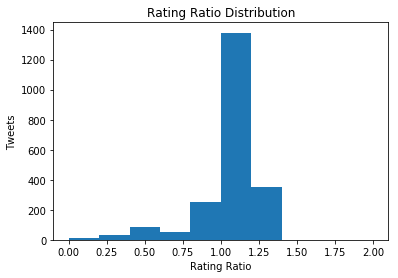

In [114]:
plt.hist(full_tweet_data_clean.rating_numerator / full_tweet_data_clean.rating_denominator, bins=10, range=(0,2));
plt.xlabel("Rating Ratio");
plt.ylabel("Tweets");
plt.title("Rating Ratio Distribution");

Based on the below plot, it appears that the favorite counts grew steadily over time, but also had an increase in variance along the y axis.

Text(0,0.5,'Favorites')

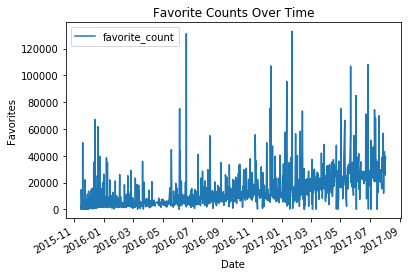

In [115]:
fig = full_tweet_data_clean.plot(x="timestamp", y="favorite_count", title="Favorite Counts Over Time");
fig.set_xlabel("Date")
fig.set_ylabel("Favorites")

From the below plot, we can see that the vast majority of tweets were made from an iphone, and only a few were made from other sources such as TweetDeck, Twitter Web Client, and Vine.

Text(0,0.5,'Tweet Source')

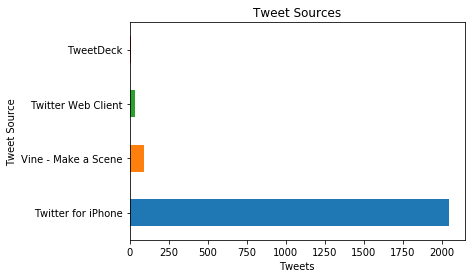

In [116]:
fig = full_tweet_data_clean.source.value_counts().plot.barh(title="Tweet Sources");
fig.set_xlabel("Tweets")
fig.set_ylabel("Tweet Source")

### Insights:
1. Most dog rating ratios were between 1 and 1.25 (numerator / denominator)

2. Over time, the favorite counts grew for each tweet on average and the variance of number of favorites each tweet go also seems to have increased over time.

3. The vast majority of tweets were made on an iPhone, but a few other sources were also used: TweetDeck, Twitter Web Client, and Vine.